In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import plot_tree
import seaborn as sns

df=pd.read_csv('creditcard.csv')
df.head()


,Feature1,Feature2,Feature3,Feature4,Feature5,Class
0,-0.579181,1.594151,-0.179226,1.263425,0.541064,1
1,0.282430,-1.232295,1.277648,-1.441178,-0.471620,1
2,-0.612290,0.056488,1.159571,-0.392510,0.668943,1
3,1.852387,0.165237,1.447065,0.366019,-0.998566,0
4,-1.964888,-0.082257,-1.825591,-0.668822,1.054327,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  1000 non-null   float64
 1   Feature2  1000 non-null   float64
 2   Feature3  1000 non-null   float64
 3   Feature4  1000 non-null   float64
 4   Feature5  1000 non-null   float64
 5   Class     1000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 47.0 KB


In [3]:
df.describe()

,Feature1,Feature2,Feature3,Feature4,Feature5,Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.047550,0.044900,-0.064007,-0.038244,0.038852,0.485000
std,0.990750,1.001842,0.997780,1.016755,0.981576,0.500025
min,-3.072983,-3.422166,-3.516928,-3.798997,-3.083190,0.000000
25%,-0.738992,-0.632470,-0.762325,-0.730530,-0.616929,0.000000
50%,-0.083491,0.064954,-0.061308,-0.070110,0.055403,0.000000
75%,0.620310,0.718623,0.612559,0.643994,0.722139,1.000000
max,2.829715,3.320476,3.649341,3.167790,2.920737,1.000000


In [4]:
print(df.isnull().sum())



Feature1    0
Feature2    0
Feature3    0
Feature4    0
Feature5    0
Class       0
dtype: int64


In [5]:
df.std()

Feature1    0.990750
Feature2    1.001842
Feature3    0.997780
Feature4    1.016755
Feature5    0.981576
Class       0.500025
dtype: float64

In [6]:
print(df['Class'].value_counts()) 

Class
0    515
1    485
Name: count, dtype: int64


In [7]:
X = df.drop('Class', axis=1)
y = df['Class']

In [8]:


# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
# Create the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
y_pred = dt_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.49666666666666665
Precision: 0.41935483870967744
Recall: 0.5158730158730159
F1 Score: 0.4626334519572954
Confusion Matrix:
[[84 90]
 [61 65]]


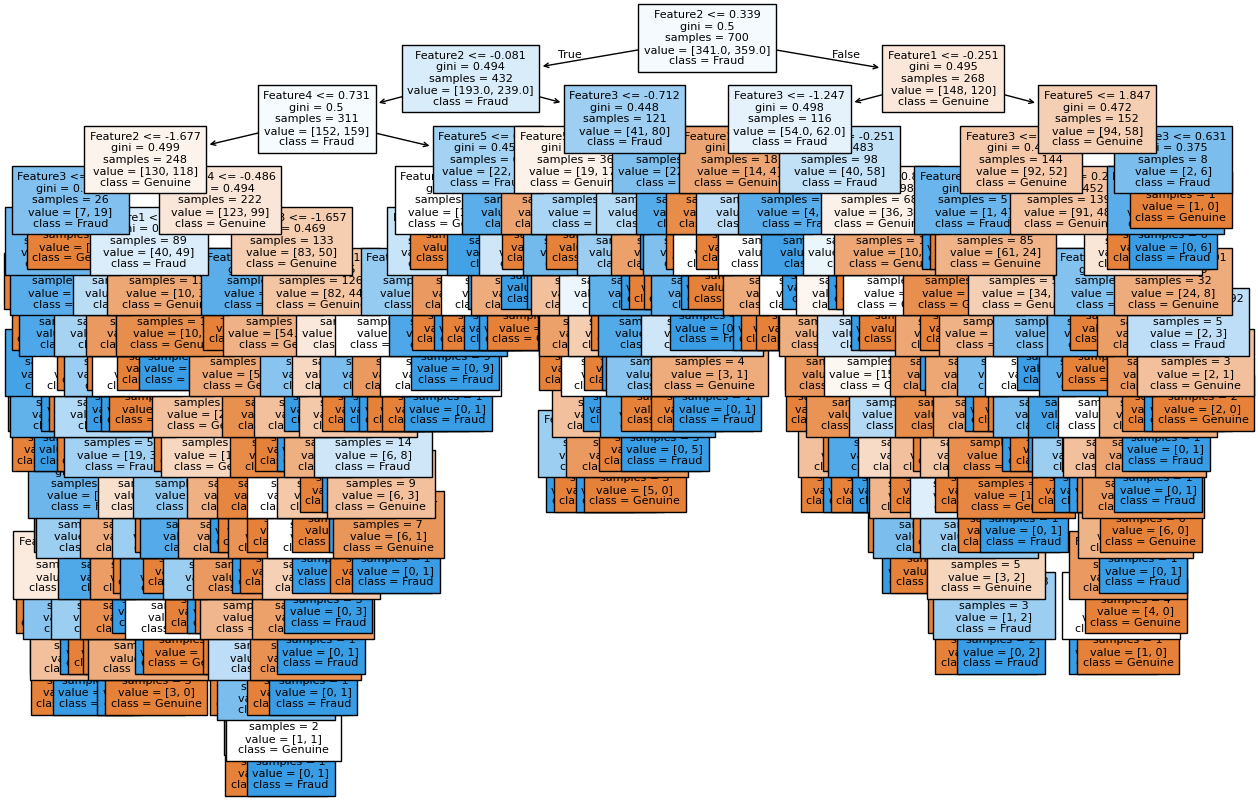

In [11]:

plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Genuine', 'Fraud'], filled=True, fontsize=8)
plt.show()

   Feature1  Feature2  Feature3  Amount
0       0.1       0.4       0.7  100.00
1       0.2       0.5       0.8  200.50
2       0.3       0.6       0.9  150.75


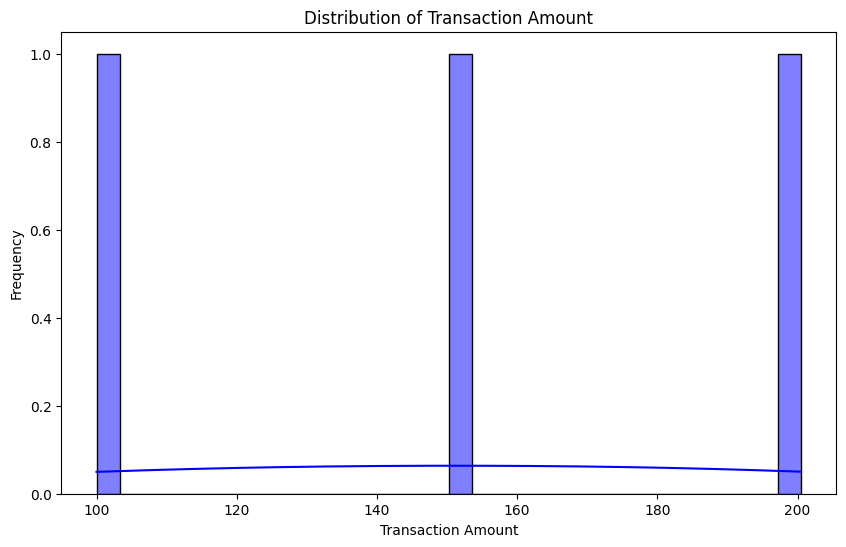

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with some sample data
data = {'Feature1': [0.1, 0.2, 0.3],
        'Feature2': [0.4, 0.5, 0.6],
        'Feature3': [0.7, 0.8, 0.9]}
df = pd.DataFrame(data)

# Create a Series with the desired values for the 'Amount' column
amount_values = [100.00, 200.50, 150.75]  # Example values, you can replace with your actual data

# Assign the Series to a new column named 'Amount' in the DataFrame
df['Amount'] = amount_values

# Now the 'Amount' column has been added to your DataFrame with the specified values
print(df)

# Plotting the histogram of the 'Amount' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=30, kde=True, color='blue')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amount')
plt.show()


   Time  Amount  Class
0     1  100.00      0
1     2  200.50      1
2     3  150.75      0
3     4  300.25      1
4     5   75.50      0


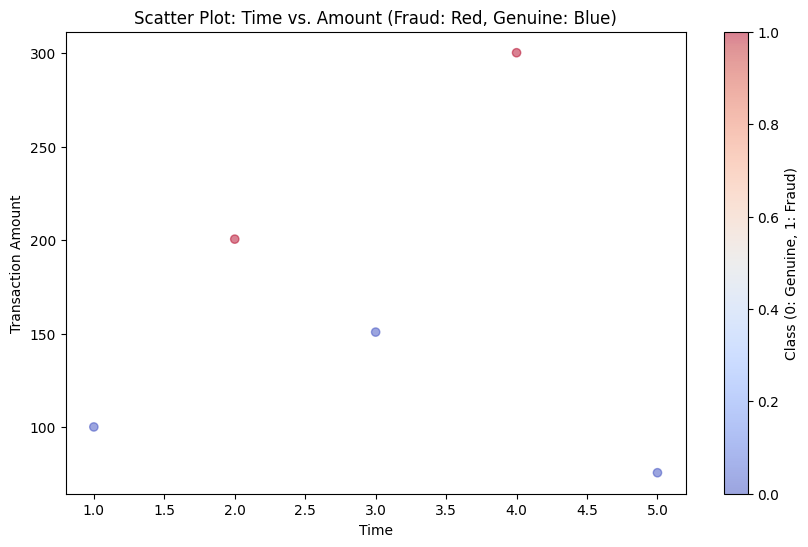

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with sample data including 'Time', 'Amount', and 'Class'
data = {
    'Time': [1, 2, 3, 4, 5],
    'Amount': [100.00, 200.50, 150.75, 300.25, 75.50],
    'Class': [0, 1, 0, 1, 0]  # 0 for genuine, 1 for fraud
}
df = pd.DataFrame(data)

# Print the DataFrame to ensure it's created correctly
print(df)

# Plotting the scatter plot of 'Time' vs. 'Amount'
plt.figure(figsize=(10, 6))
plt.scatter(df['Time'], df['Amount'], c=df['Class'], cmap='coolwarm', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.title('Scatter Plot: Time vs. Amount (Fraud: Red, Genuine: Blue)')
plt.colorbar(label='Class (0: Genuine, 1: Fraud)')
plt.show()


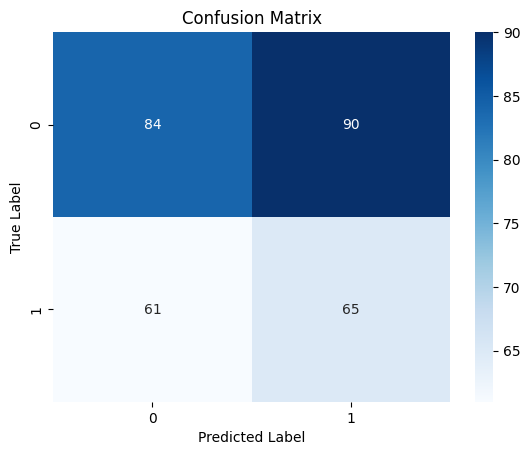

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


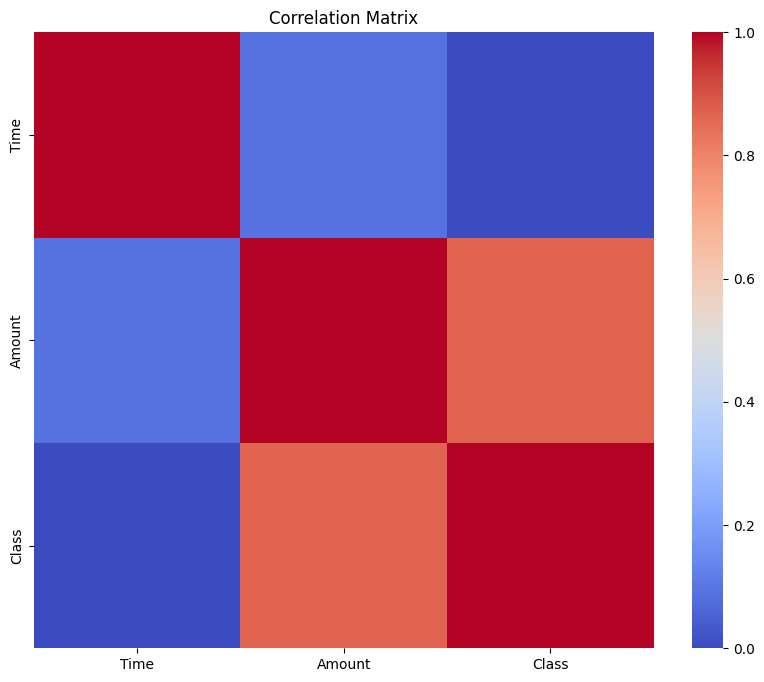

In [15]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()
